## Exercises 1 and 2

Load your zillow dataset.

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [1]:
#Import dependencies
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from wrangle import wrangle_zillow

In [2]:
#Read in the dataset
df = wrangle_zillow()
df.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,tax_amount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [3]:
#Split the dataset
seed = 42

train, validate = train_test_split(df, test_size=0.2,
                                   random_state=seed)

In [4]:
#Create the scaler and fit/transform my square footage column
mms = MinMaxScaler()

train['sq_ft'] = mms.fit_transform(train[['sq_ft']])

train.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,tax_amount,fips
173699,3.0,2.0,0.001668,145890.0,2001.0,2652.27,6037.0
1929078,3.0,2.0,0.001347,103646.0,1956.0,1355.82,6037.0
1908792,3.0,2.0,0.001896,636371.0,1961.0,8514.79,6037.0
1685145,3.0,1.0,0.001076,279832.0,1950.0,5207.06,6037.0
1320396,2.0,1.0,0.001263,364416.0,1905.0,4508.23,6037.0


In [5]:
#Drop the columns that aren't relevant to the exercises
train.drop(columns=['bedrooms', 'bathrooms', 'year_built', 'tax_amount', 'fips'], inplace=True)

In [6]:
#Create an instance of the model and fit it to my data
lm = LinearRegression().fit(train[['sq_ft']],
                            train['home_value'])

In [7]:
#Generate predictions
yhat = lm.predict(train[['sq_ft']])
yhat

array([393361.15041252, 318069.05522031, 446754.56432334, ...,
       375399.31070981, 344150.63067905, 511466.39777286])

In [8]:
#Add the predictions to my dataframe
train['yhat'] = yhat
train.head()

,sq_ft,home_value,yhat
173699,0.001668,145890.0,393361.150413
1929078,0.001347,103646.0,318069.055220
1908792,0.001896,636371.0,446754.564323
1685145,0.001076,279832.0,254587.484764
1320396,0.001263,364416.0,298384.847327


## Exercise 3

Plot the residuals for the linear regression model that you made.

In [9]:
#Calculate the residuals as a new column in my dataframe
train['residuals'] = train['yhat'] - train['home_value']
train.head()

,sq_ft,home_value,yhat,residuals
173699,0.001668,145890.0,393361.150413,247471.150413
1929078,0.001347,103646.0,318069.055220,214423.055220
1908792,0.001896,636371.0,446754.564323,-189616.435677
1685145,0.001076,279832.0,254587.484764,-25244.515236
1320396,0.001263,364416.0,298384.847327,-66031.152673


Text(0.5, 1.0, 'Residual vs Home Value Plot')

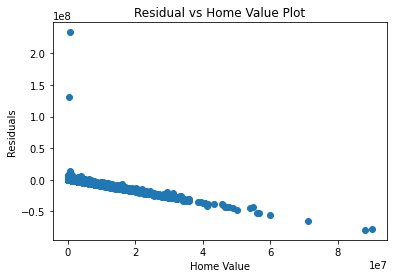

In [10]:
#Plot my residuals over the home value
plt.scatter(x='home_value', y='residuals', data=train)
plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')

## Exercise 4

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [12]:
#Calculate the sum of squared errors
sse = mean_squared_error(train['home_value'], train['yhat']) * len(train)
sse

6.167882984403112e+17

In [13]:
#Calculate the explained sum of squares
ess = sum((train['yhat'] - train['home_value'].mean()) ** 2)
ess

1.691745624162047e+17

In [14]:
#Add the previous two metrics to get the total sum of squares
tss = sse + ess
tss

7.859628608565158e+17

In [15]:
#Calculate mean squared error
mse = mean_squared_error(train['home_value'], train['yhat'])
mse

360233980404.2028

In [16]:
#Take the root of mean squared error to get root mean squared error
rmse = math.sqrt(mse)
rmse

600194.9519982677

## Exercise 5

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [17]:
#Create a baseline by predicting the average home value every time
train['baseline'] = train['home_value'].mean()
train.head()

,sq_ft,home_value,yhat,residuals,baseline
173699,0.001668,145890.0,393361.150413,247471.150413,460558.350816
1929078,0.001347,103646.0,318069.055220,214423.055220,460558.350816
1908792,0.001896,636371.0,446754.564323,-189616.435677,460558.350816
1685145,0.001076,279832.0,254587.484764,-25244.515236,460558.350816
1320396,0.001263,364416.0,298384.847327,-66031.152673,460558.350816


In [18]:
#Calculate the sum of squared errors for the baseline prediction
sse_b = mean_squared_error(train['home_value'],
                           train['baseline']) * len(train)
sse_b

7.859628608565888e+17

In [19]:
#Calculate mean squared error for baseline prediction
mse_b = mean_squared_error(train['home_value'],
                           train['baseline'])
mse_b

459040047504.4731

In [20]:
#Calculate root mean squared error for baseline
rmse_b = math.sqrt(mse_b)
rmse_b

677524.9423485996

## Exercise 6

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [21]:
#Evaluate the result of my model against the baseline
if sse < sse_b:
    print('The linear regression model outperforms the baseline!')
else:
    print('The model fails to improve upon the baseline.')

The linear regression model outperforms the baseline!


## Exercise 7

What is the amount of variance explained in your model?

In [22]:
#Calculate how much variance is explained by my model
r2 = ess / tss
r2

0.21524498273600862

## Exercise 8

Is your model better than the baseline model?

Yes but I'm not proud of it.

## Exercise 9

Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

regression_errors(y, yhat): returns the following values:  
sum of squared errors (SSE)  
explained sum of squares (ESS)  
total sum of squares (TSS)  
mean squared error (MSE)  
root mean squared error (RMSE)  

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model  

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [23]:
#Dependencies for these functions
import math
from sklearn.metrics import mean_squared_error

In [24]:
def plot_residuals(y, yhat):
    residuals = yhat - y
    plt.scatter(x=y, y=residuals)
    plt.title('Residual plot')    

In [25]:
def regression_errors(y, yhat):
    sse = mean_squared_error(y, yhat) * len(y)
    ess = sum((yhat - y.mean()) ** 2)
    tss = sse + ess
    mse = mean_squared_error(y, yhat)
    rmse = math.sqrt(mse)
    return sse, ess, tss, mse, rmse

In [26]:
def baseline_mean_errors(y):
    sse = mean_squared_error(y, y.mean()) * len(y)
    mse = mean_squared_error(y, y.mean())
    rmse = math.sqrt(mse)
    return sse, mse, rmse

In [27]:
def better_than_baseline(y, yhat):
    sse = regression_errors(y, yhat)
    sse_b = baseline_mean_errors(y)
    if sse < sse_b:
        return True
    else:
        return False